In [1]:
processed = "/home/xps/educate/code/hust/DS_20222/data-science-e10/data/processed"

In [46]:
from glob import glob
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np
from wordcloud import WordCloud
from transformers import AutoModel, AutoTokenizer
import torch


In [10]:
topic = ["politics", "insult"]
text =  dict([(topic[i], [line for line in open(processed + f"/{topic[i]}.txt", 'r').readlines()]) for i in range(len(topic))])
lengths = dict([(topic[i], [len(line.split()) for line in open(processed + f"/{topic[i]}.txt", 'r').readlines()]) for i in range(len(topic))])

In [38]:
def frequency(lengths):
    freq = {}
    for length in lengths:
        if length not in freq:
            freq[length] = 1
        else:
            freq[length] += 1 

    return [(length, freq[length]) for length in freq.keys()]
        

In [6]:
def kde_plot(data):
    kde = gaussian_kde(data)
    x = [i for i in range(0, 250)]
    data = [kde(i) for i in range(0, 250)]
    return x, data


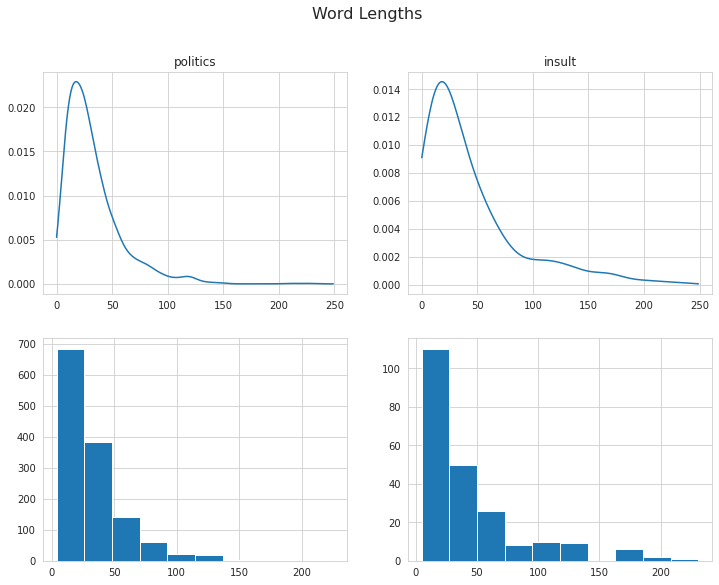

In [9]:
#word lengths
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 9))
fig.suptitle('Word Lengths', fontsize=16)
for i in range(len(axes)):
    x, data = kde_plot(data=lengths[topic[i]])
    axes[0, i].plot(x, data)
    axes[1, i].hist(lengths[topic[i]])

    
    axes[0, i].set_title(topic[i])
sns.set_style("dark")
plt.show()


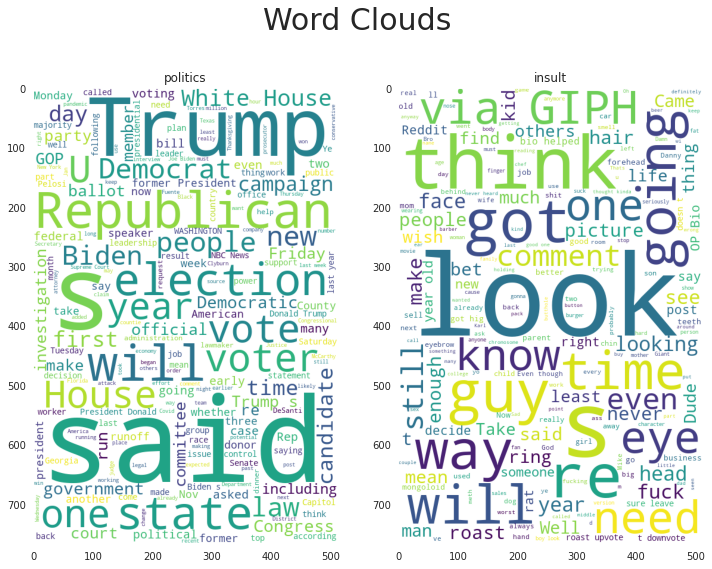

In [24]:
#cloud

#word lengths
fig, axes = plt.subplots(ncols=2, figsize=(12, 9))
fig.suptitle('Word Clouds', fontsize=30)
for i in range(len(axes)):
    wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 768,
                        ).generate(' '.join([text[topic[i]][j] for j in range(len(text[topic[i]]))]))
    axes[i].imshow(wordcloud)
    axes[i].set_title(topic[i])
sns.set_style("dark")
plt.show()


plt.show()

In [26]:
#feature map
pretrained_model = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(pretrained_model)
model = AutoModel.from_pretrained(pretrained_model)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [49]:
def get_tokens(corpus, topics):
    def tokenize(text):
        return tokenizer(text,
        max_length=64,
        padding="max_length",
        truncation=True,
        )
    b_input_ids, b_attention_masks = [], []
    for topic in topics:
        for text in corpus[topic]:
            input = tokenize(text)
            b_input_ids.append(input.input_ids)
            b_attention_masks.append(input.attention_mask)

    return torch.tensor(b_input_ids, dtype=torch.long), torch.tensor(b_attention_masks, dtype=torch.long)
def get_feature_map(b_input_ids, b_attention_masks):
    return model()
            


In [50]:
tokens = get_tokens(text, topic)

In [39]:
model(**input)

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.2472,  0.2461, -0.1237,  ..., -0.1760, -0.0418,  0.0844],
         [-0.4258, -0.3488, -0.1942,  ...,  0.1206,  0.3738,  0.2353],
         [ 0.2542, -0.4884, -0.5273,  ...,  0.4206, -0.0646,  0.4352],
         ...,
         [ 0.1814, -0.0444, -0.4120,  ..., -0.2739, -0.0934, -0.0042],
         [ 0.2221, -0.3117, -0.0392,  ..., -0.6328, -0.1971, -0.1023],
         [ 0.6032, -0.2380,  0.1917,  ..., -0.1100,  0.2605, -1.0412]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-0.4758,  0.2927,  0.9986, -0.9617,  0.8827,  0.9362,  0.8746, -0.9961,
         -0.9000, -0.3552,  0.9027,  0.9924, -0.9993, -0.9986,  0.8311, -0.8865,
          0.9394, -0.2716, -0.9997, -0.6659, -0.7679, -0.9987,  0.0140,  0.9810,
          0.8662, -0.0193,  0.9306,  0.9996,  0.5000, -0.1233,  0.0914, -0.9522,
          0.9063, -0.9930,  0.1210,  0.6027,  0.6930, -0.0100,  0.8185, -0.9462,
         -0.3303, -0.6290,  0.67